# Plot Temperature Live With Threads
This example uses a command line program to plot the temperature of the Xilinx Zynq chip.

The simplest way to get the internal Red Pitaya temperature is to use `xadc_get_value_temp` as described in the forum post below
https://forum.redpitaya.com/viewtopic.php?t=1078 

This command can be run repeatedly to create a graph

Get the current temperature, this is returned as a string 

In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
from datetime import datetime, date
import time
import pandas as pd
import ipywidgets as widgets
import threading

filename = str(date.today()) + " temperature data.csv"

In [2]:
headers = ["Temperature (oC)","Date"]
try:
    df = pd.read_csv(filename,names=headers,skiprows = 1)
    df
except:
    df = pd.DataFrame() #Create an empty data frame to append to later
df

""


In [3]:
keep_running = True

def collect_data():
    while keep_running == True:
        global df
        clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
        current_temp = !xadc_get_value_temp
        temp_value = float(current_temp[0][:5])
        clear_output(wait=True)
        display('Collecting temperatures. '+ str(len(df.index)) +' value(s) recorded.')
        clean_data_table['Temperature (oC)'] = [temp_value]
        clean_data_table['Date'] = [datetime.now()]
        df = df.append(clean_data_table)
        time.sleep(1)

In [4]:
keep_running = True
t1=threading.Thread(target=collect_data)
t1.start()

In [5]:
keep_running = False

In [6]:
df

'Collecting temperatures. 0 value(s) recorded.'

""


In [7]:
df[headers] #Make sure the DataFrame is in the correct order
df.to_csv(filename,names=headers)
df

,Temperature (oC),Date
0,67.43,2022-06-26 11:48:04.596720


In [8]:
df = pd.read_csv(filename,names=headers,skiprows = 1)
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
df = pd.read_csv(filename, parse_dates=['Date'], date_parser=dateparse,index_col=0)
df

,Temperature (oC),Date
0,67.43,2022-06-26 11:48:04.596720


<IPython.core.display.Javascript object>


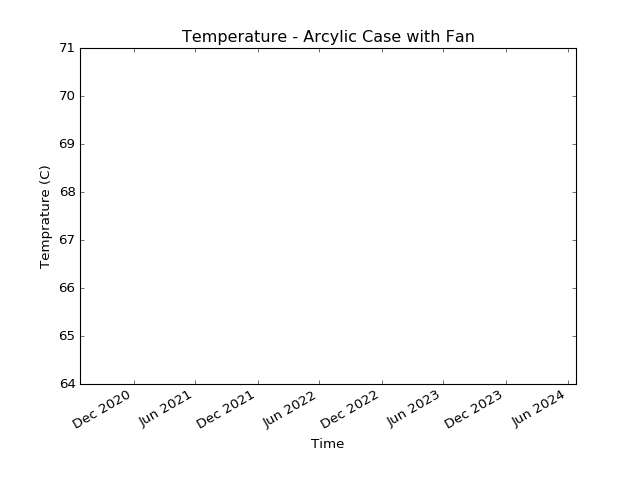

In [9]:
x = df['Date']
y1 = df['Temperature (oC)']

plt.plot(x,y1)  # Plot some data on the (implicit) axes.
plt.xlabel('Time')
plt.ylabel('Temprature (C)')
plt.title("Temperature - Arcylic Case with Fan")
plt.gcf().autofmt_xdate()
plt.show()

In [10]:

def animate(i):
    global df
    clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
    current_temp = !xadc_get_value_temp
    temp_value = float(current_temp[0][:5])
    clear_output(wait=True)
    display('Collecting temperatures. '+ str(len(df.index)) +' value(s) recorded.')
    clean_data_table['Temperature (oC)'] = [temp_value]
    clean_data_table['Date'] = [datetime.now()]
    df = df.append(clean_data_table)
    
    x = df['Date']
    y1 = df['Temperature (oC)']
    
    plt.cla()
    plt.plot(x,y1)
    plt.xlabel('Time')
    plt.ylabel('Temprature (C)')
    plt.title("Temperature - Arcylic Case with Fan")
    plt.gcf().autofmt_xdate()
    plt.show()
    
ani = FuncAnimation(plt.gcf(), animate,interval=2000)
plt.show()

<IPython.core.display.Javascript object>


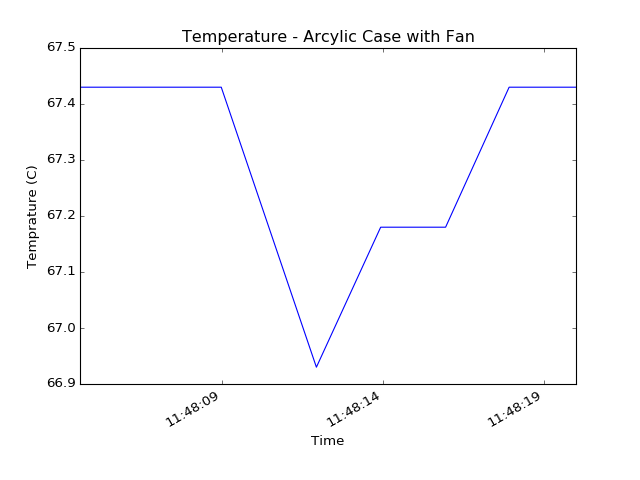

In [11]:
#x = df['Date']
#y1 = df['Temperature (oC)']

# plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    x = df['Date']
    y1 = df['Temperature (oC)']
    ax1.cla()
    fig.clf()
    ax1.plot(x,y1, label='Temperature (oC)')

#ani = animation.FuncAnimation(fig,animate, interval=1000)
animate(1)

#plt.cla()
#plt.plot(x,y1, label='Temperature (oC)')
#plt.legend()
# beautify the x-labels
plt.gcf().autofmt_xdate()
#plt.tight_layout()
plt.show()

In [12]:
df[headers] #Make sure the DataFrame is in the correct order
df.to_csv(filename,names=headers)
df

,Temperature (oC),Date
0,67.43,2022-06-26 11:48:04.596720
